In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
ava_csv=pd.read_csv("C:\\Users\\pinki\\Desktop\\avocado.csv")


In [42]:
ava_csv

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


**Checking datatypes of all the columns**

In [43]:
ava_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


Observation- after checking the data types of the columns we come across that the data is divided into three types integer, object and float.

**Checking if there are any null values**

In [44]:
ava_csv.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

We can see that no missing values exist in dataset.

**Describing Datasets:**

In [45]:
ava_csv.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


We can see all columns having count 18249. Looks like it doesn't contain missing values

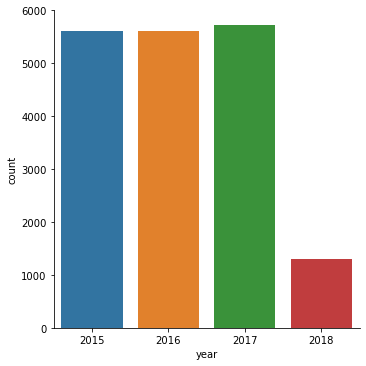

In [46]:
# numbers of values for each year.
sns.catplot(x='year',data=ava_csv,kind='count')

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

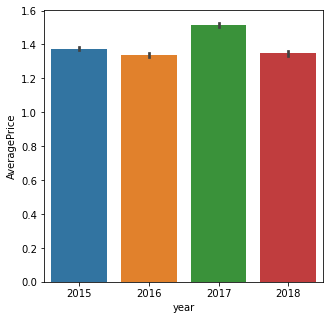

In [47]:
# average pricevs year
plot=plt.figure(figsize=(5,5))
sns.barplot(x='year',y='AveragePrice',data=ava_csv)

<AxesSubplot:xlabel='year', ylabel='Total Volume'>

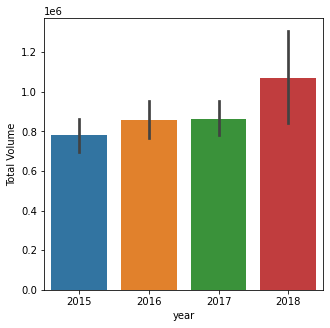

In [48]:
# average total volume
plot=plt.figure(figsize=(5,5))
sns.barplot(x='year',y='Total Volume',data=ava_csv)

<AxesSubplot:xlabel='year', ylabel='Small Bags'>

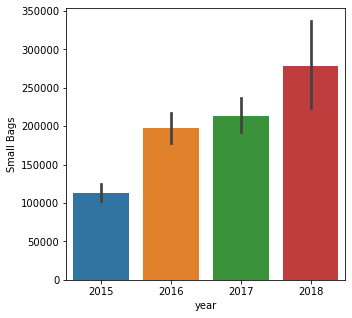

In [49]:
# average small bags
plot=plt.figure(figsize=(5,5))
sns.barplot(x='year',y='Small Bags',data=ava_csv)

<AxesSubplot:xlabel='year', ylabel='Large Bags'>

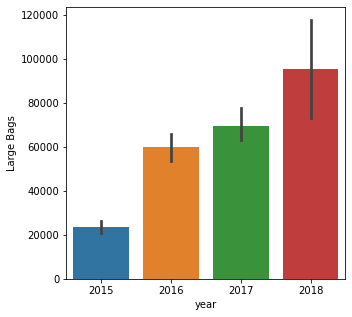

In [50]:
# average large bags
plot=plt.figure(figsize=(5,5))
sns.barplot(x='year',y='Large Bags',data=ava_csv)

<AxesSubplot:xlabel='year', ylabel='XLarge Bags'>

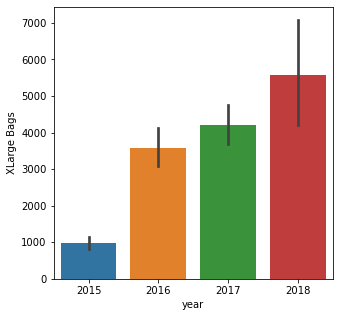

In [51]:
# average Xlarge bags
plot=plt.figure(figsize=(5,5))
sns.barplot(x='year',y='XLarge Bags',data=ava_csv)

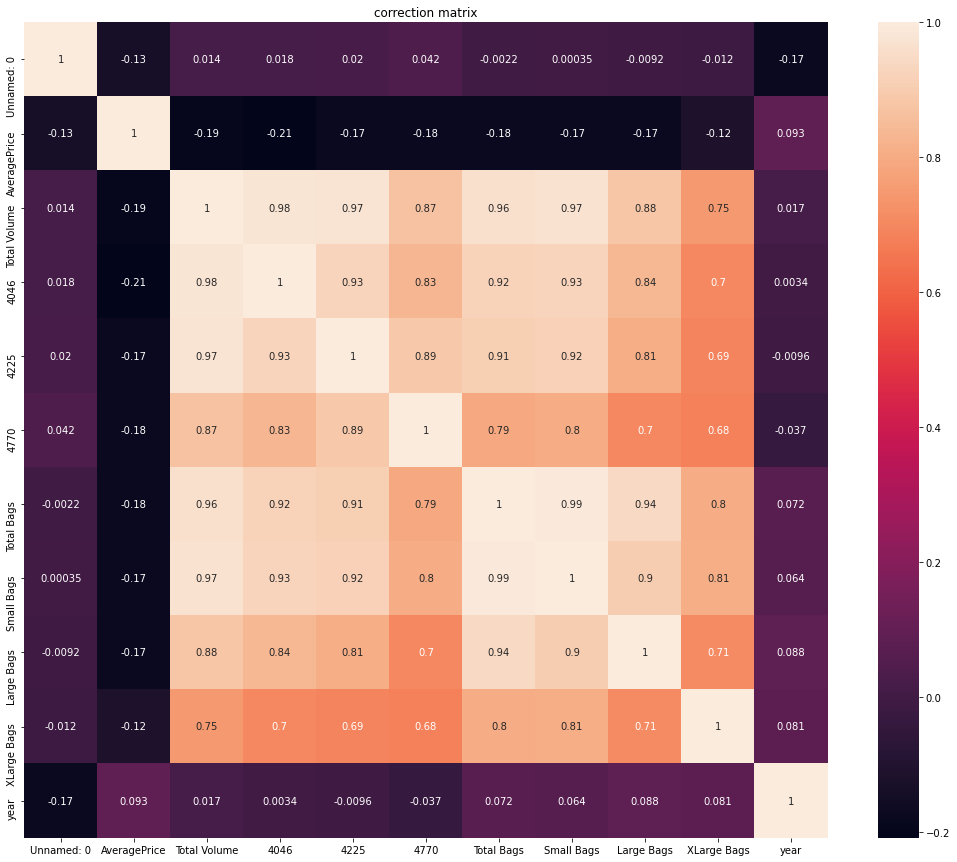

In [52]:
corr_mat=ava_csv.corr()
plt.figure(figsize=(18,15))
sns.heatmap(corr_mat,annot=True)
plt.title("correction matrix")
plt.show()


In [53]:
# Data Preprocessing - sepreate the data & label
X=ava_csv.drop('year',axis=1)

In [54]:
# Label Binarization
Y=ava_csv['year'].apply(lambda y_value:1 if y_value>=7 else 0)
print(Y)

0        1
1        1
2        1
3        1
4        1
        ..
18244    1
18245    1
18246    1
18247    1
18248    1
Name: year, Length: 18249, dtype: int64


In [55]:
# Train & Test Split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=3)
print(Y.shape,Y_train.shape,Y_test.shape)

(18249,) (14599,) (3650,)
